# 2D Convolution

Convolution operations form the backbone of most current deep learning frameworks. A good example of 2D convolution in practice is the Gaussian Filter that, when applied to an image, results in a blurring effect on the input. 

From a computational perspective, this is an operation that multiplies a small $K$x$K$ constant 2D **kernel** with an $N$x$N$ input 2D **image**. This is done by moving the smaller kernel, one pixel at a time, over the $N$x$N$ image. We can visualize this as shown below. *Credit: https://github.com/vdumoulin/conv_arithmetic*

![](full_padding_no_strides.gif)

At this point, you might have questions about the exact starting position, the motion order, boundary conditions, etc. Those are all good questions, and to minimize complexity, we have simplified the operation to the code block show below. 

We first allocate storage for input images, output image. and the kernel.

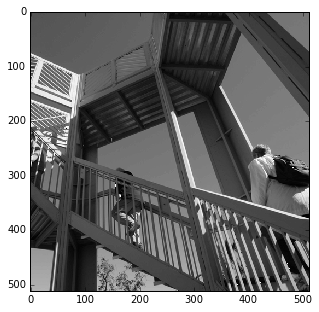

In [1]:
# Modeled on github.com/BLVC/caffe.git

# magic function to import numpy, matplotlib, etc in jupyter notebook
from pylab import * 
import numpy as np
import matplotlib.pyplot as plt

# display plots in this notebook
%matplotlib inline
# set display defaults
plt.rcParams['figure.figsize'] = (5, 5)        # medium images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap

from scipy import ndimage, misc, signal;

f = misc.ascent();
imshow(f);


Now that the data-structures have been allocated, we can proceed to the core arithmetic components of convolution. Here the **convolve2D** method accepts input and output *Mat* object references. The OpenCV (computer vision) library provides the implementation for these objects that contain the 2D data structures to hold the images along with other metadata that is useful for file I/O and other tasks on the image.

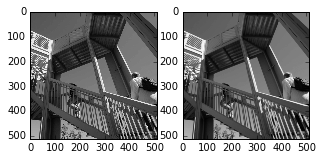

In [2]:
gauss_filter = np.array([[1,2,1],
...                      [2,4,2],
...                      [1,2,1]]);

res = signal.convolve2d(f,gauss_filter, boundary='symm', mode='same');

fig, (a, b) = plt.subplots(1, 2)
a.imshow(f, cmap='gray')
b.imshow(res, cmap='gray')
plt.show() # apparently, plt.show() works than fig.show() in juypter

The edges in the filtered image appear blurred. This is the effect of Gaussian Filtering.